In [28]:
import numpy
from matplotlib import pyplot
import sympy

%matplotlib inline

In [29]:
sympy.init_printing()

In [30]:
x = sympy.symbols('x')

In [31]:
x

In [32]:
5*x

In [33]:
x, nu, t = sympy.symbols('x nu t')

In [34]:
nu

In [35]:
phi = (sympy.exp(-(x-4 * t)**2 / (4*nu*(t+1))) + 
       sympy.exp(-(x-4*t - 2*sympy.pi)**2 / (4*nu*(t+1))))

In [36]:
phi

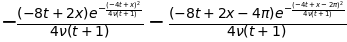

In [37]:
phiprime = phi.diff(x)
phiprime

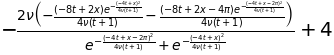

In [38]:
u = -2 * nu * phiprime / phi + 4
u

In [39]:
from sympy.utilities.lambdify import lambdify

In [40]:
u_lamb = lambdify((t, nu, x), u)

In [41]:
type(u_lamb)

function

In [42]:
u_lamb(1, 4, 3)

In [43]:
nx = 101
L = 2 * numpy.pi
dx = L / (nx-1)
nu = 0.07
sigma = 0.1
dt = sigma * dx**2/nu
nt = 100

In [44]:
x = numpy.linspace(0.0, L, num=nx)

In [45]:
u0 = numpy.empty(nx)
for i in range (nx):
    u0[i] = u_lamb(0.0, nu, x[i])

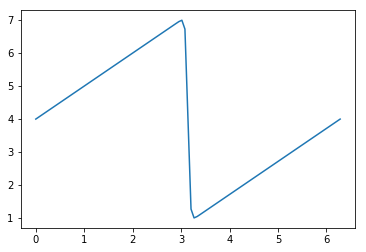

In [48]:
pyplot.plot(x, u0)

In [49]:
u_hist = [u0.copy()]
u = u.copy()
for n in range(nt):
    un = u.copy()
    u[1:-1] = (un[1:-1] - 
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) + 
               nu * dt / dx**2 * (un[:-2] - 2 * un[1:-1] + un[2:]))
    
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 * (un[-2] - 2 * un[0] + un[1])
    u[-1] = u[0]
    u_hist.append(u.copy())

TypeError: 'Add' object is not subscriptable